In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import odeint

In [3]:
def lotka(y, t):
    dx = 2/3 * y[0] - 4/3 * y[0]*y[1]
    dy = y[0]*y[1] - y[1]
    
    return [dx, dy]

Create a list *y0* of initial conditions and an array of *times* at which you want to know the solution to the problem. Note that this is **not** related to the time-step used by the integrator (which is controlled automatically by default):

In [4]:
y0 = [1, 1]
t = np.linspace(0,20,100)

Finally, call the `odeint()` function and obtain the solution.

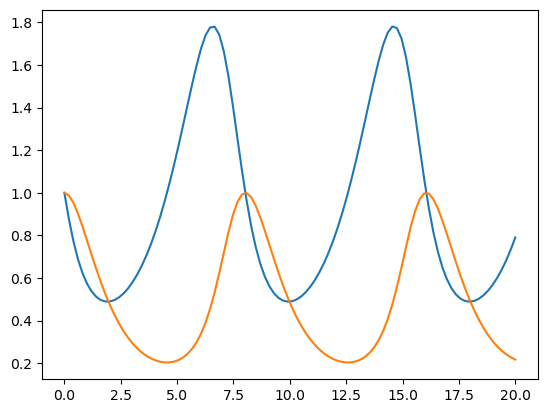

In [5]:
y = odeint(lotka, y0, t)
plt.plot(t,y)

If you want just the data of a single independent variable, you can use the colon-operator `:` to slice y:

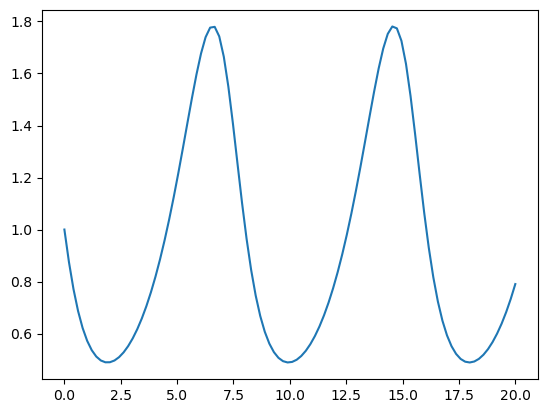

In [6]:
plt.plot(t,y[:,0])

`y[:,0]` means that we want to extract *entire* 0'th column.  For more details on slicing, please refer to the NumPy documentation:

https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

Let's try to visualize the phase space. For this we generate a couple of initial conditions between 0 and 2 and solve the trajectories, which we plot into the $x-y$ phase space. We access the $x$ and $y$ variable by slicing the `y`-array into its separate columns.

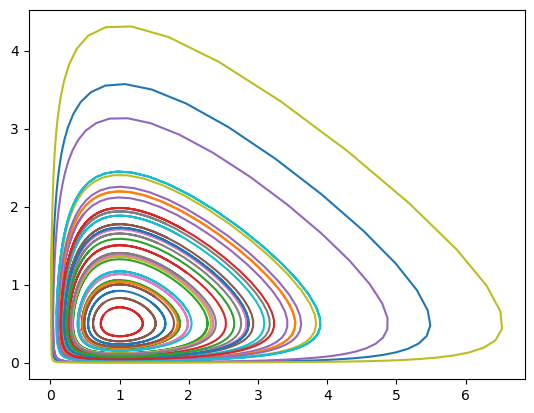

In [7]:
t = np.linspace(0,15,200)

for i in range(30):
    y0 = np.random.rand(2)*2
    y = odeint(lotka, y0, t)
    plt.plot(y[:,0], y[:,1])

Lastly, let's draw a portrait of the phase space around the fixpoint. Use `meshgrid()` to generate 20x20 sample points:

In [8]:
x = np.linspace(0,5,20)
y = np.linspace(0,3,20)

X,Y = np.meshgrid(x,y)

Then, calculate the differentials at these sample points:

In [9]:
DX = 2/3*X - 4/3*X*Y
DY = X*Y - Y

Finally, draw the portrait with the `quiver()` function. Use the `xlabel` and `ylabel` functions to label the axis:

Text(0, 0.5, 'y')

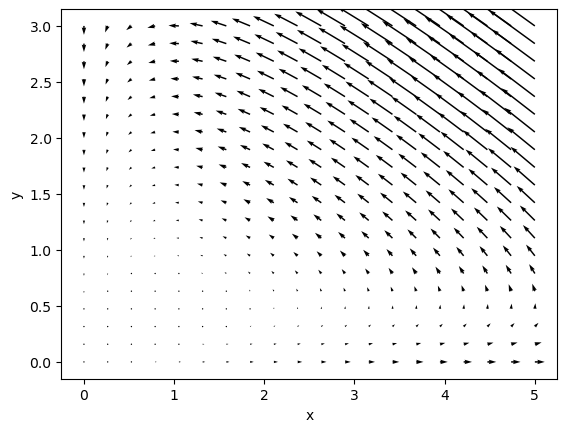

In [10]:
plt.quiver(X,Y,DX,DY)
plt.xlabel("x")
plt.ylabel("y")

It might be better to normalize the vectors and color them depending on the flow strength. We remove the zeros from the normalization and substitute them with `NaN`s. This will make Matplotlib ignore those values.



Text(0, 0.5, 'y')

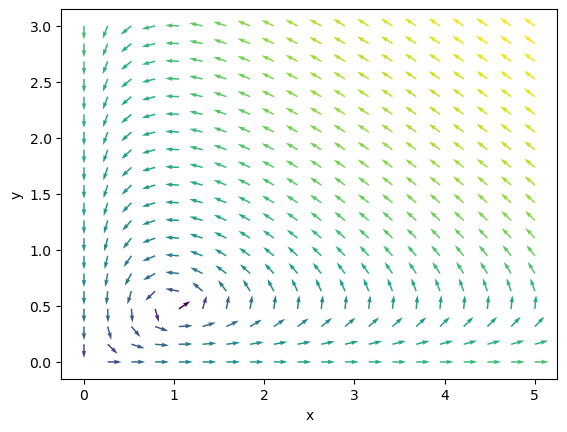

In [11]:
N = np.sqrt(DX**2 + DY**2)
N[N==0] = np.nan
plt.quiver(X, Y, DX/N, DY/N, np.log(N))
plt.xlabel("x")
plt.ylabel("y")